---
author:
- 'Adrian E. Feiguin'
title: 'Computational Physics'
...

Ordinary differential equations
=========================================

Let’s consider a simple 1st order equation: 
$$\frac{dy}{dx}=f(x,y)$$

To solve this equation with a computer we need to **discretize** the differences: we
have to convert the differential equation into a “**finite differences**” equation. The simplest
solution is Euler’s method.

Euler’s method
--------------

Supouse that at a point $x_0$, the function $f$ has a value $y_0$. We
want to find the approximate value of $y$ in a point $x_1$ close to
$x_0$, $x_1=x_0+\Delta x$, with $\Delta x$ small. We assume that $f$,
the rate of change of $y$, is constant in this interval $\Delta x$.
Therefore we find: $$\begin{eqnarray}
&& dx \approx \Delta x &=&x_1-x_0, \\
&& dy \approx \Delta y &=&y_1-y_0,\end{eqnarray}$$ with
$y_1=y(x_1)=y(x_0+\Delta x)$. Then we re-write the differential equation in terms of discrete differences as:
$$\frac{\Delta y}{\Delta x}=f(x,y)$$ or 
$$\Delta y = f(x,y)\Delta x$$
and approximate the value of $y_1$ as
$$y_1=y_0+f(x_0,y_0)(x_1-x_0)$$ We can generalize this formula to find
the value of $y$ at $x_2=x_1+\Delta x$ as
$$y_{2}=y_1+f(x_1,y_1)\Delta x,$$ or in the general case:
$$y_{n+1}=y_n+f(x_n,y_n)\Delta x$$

This is a good approximation as long as $\Delta x$ is “small”. What is
small? Depends on the problem, but it is basically defined by the “rate
of change”, or “smoothness” of $f$. $f(x)$ has to behave smoothly and
without rapid variations in the interval $\Delta x$.

Notice that Euler’s method is equivalent to a 1st order Taylor expansion
about the point $x_0$. The “local error” calculating $x_1$ is then
$O(\Delta x^2)$. If we use the method $N$ times to calculate $N$
consecutive points, the propagated “global” error will be
$NO(\Delta x^2)\approx O(\Delta 
x)$. This error decreases linearly with decreasing step, so we need to
halve the step size to reduce the error in half. The numerical work for
each step consists of a single evaluation of $f$.

### Exercise 1.1: Newton’s law of cooling 

If the temperature difference between an object and its surroundings is
small, the rate of change of the temperature of the object is
proportional to the temperature difference: $$\frac{dT}{dt}=-r(T-T_s),$$
where $T$ is the temperature of the body, $T_s$ is the temperature of
the environment, and $r$ is a “cooling constant” that depends on the
heat transfer mechanism, the contact area with the environment and the
thermal properties of the body. The minus sign appears because if
$T>T_s$, the temperature must decrease.

Write a program to calculate the temperature of a body at a time $t$,
given the cooling constant $r$ and the temperature of the body at time
$t=0$. Plot the results for $r=0.1\frac{1}{min}$; $T_s=83^{\circ} C$, $T_0=10^{\circ}$
using different intervals $\Delta t$ and compare with exact (analytical)
results.

In [19]:
# 9/18/17
# Like Euler above, but now f(x) = -r(T-T0)

T0 = 10.   # initial temperature
Ts = 83.   # temp. of the environment
r = 0.1    # cooling rate
dt = 0.05  # time step
tmax = 60. # maximum time
nsteps = int(tmax/dt)  # number of steps

In [20]:
T = T0
for i in range(1,nsteps+1):
    new_T = T - r*(T-Ts)*dt
    T = new_T
    

Let's try plotting the results. We first need to import the required libraries and methods

In [21]:
%matplotlib inline
import numpy as np #Allows the use of arrays
from matplotlib import pyplot 

Next, we create numpy arrays to store the (x,y) values 

In [22]:
my_time = np.zeros(nsteps)
my_temp = np.zeros(nsteps)

We have to re write the loop to store the values in the arrays. Remember that numpy arrays start from 0.

In [23]:
T = T0
my_temp[0] = T0
for i in range(1,nsteps):
    T = T - r*(T-Ts)*dt
    my_time[i] = i*dt # Fill ith array cell with incremented t
    my_temp[i] = T # Fill ith array cell with incremented T

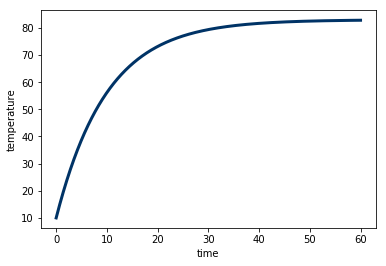

In [24]:
pyplot.plot(my_time, my_temp, color='#003366', ls='-', lw=3) 
pyplot.xlabel('time')
pyplot.ylabel('temperature');

We could have saved effort by defining

In [25]:
my_time = np.linspace(0.,tmax,nsteps) # a way to define an array

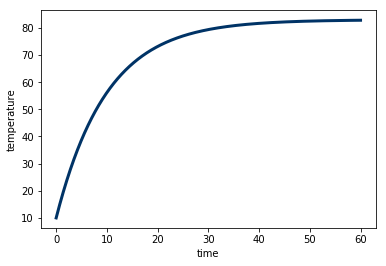

In [26]:
pyplot.plot(my_time, my_temp, color='#003366', ls='-', lw=3) # color = red green blue (think order correct) each has range from ~ 0 to 25
pyplot.xlabel('time')
pyplot.ylabel('temperature');

Alternatively, and in order to re use code in future problems, we could have created a function.

In [27]:
def euler(y, f, dx):
    """Computes y_new = y + f*dx
    
    Parameters
    ----------
    y  : float
        old value of y_n at x_n
    f  : float
        first derivative f(x,y) evaluated at (x_n,y_n)
    dx : float
        x step
    """
    
    return y + f*dx

In [28]:
T = T0
for i in range(1,nsteps):
    T = euler(T, -r*(T-Ts), dt) # Incrementing T value with Euler defined function
    my_temp[i] = T


Actually, for this particularly simple case, calling a function may introduce unecessary overhead, but it is an example that we will find useful for future applications. For a simple function like this we could have used a "lambda" function (more about lambda functions <a href="http://www.secnetix.de/olli/Python/lambda_functions.hawk">here</a>).

In [29]:
euler = lambda y, f, dx: y + f*dx 

Now, let's study the effects of different time steps on the convergence:

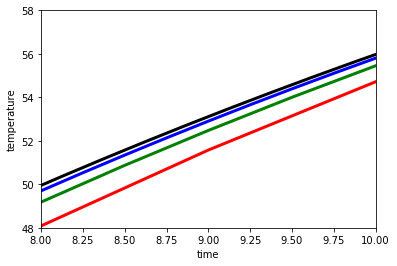

In [30]:
dt = 1.
#my_color = ['#003366','#663300','#660033','#330066']
my_color = ['red', 'green', 'blue', 'black']
for j in range(0,4):
    nsteps = int(tmax/dt)    #the arrays will have different size for different time steps
    my_time = np.linspace(dt,tmax,nsteps) # Good shortcut for Time array
    my_temp = np.zeros(nsteps) # Initializing Temperature Array
    T = T0
    for i in range(1,nsteps):
        T = euler(T, -r*(T-Ts), dt)
        my_temp[i] = T # Filling Temperature array with Euler increments
        
    pyplot.plot(my_time, my_temp, color=my_color[j], ls='-', lw=3) #Plotting T vs. t for dt
    dt = dt/2. #Updating dt, repeat process.

pyplot.xlabel('time'); #The semicolon avoids something 
pyplot.ylabel('temperature');
pyplot.xlim(8,10);
pyplot.ylim(48,58);

### Challenge 1.1

To properly study convergence, one possibility it to look at the result at a given time, for different time steps. Modify the previous program to print the temperature at $t=10$ as a function of $\Delta t$. 

In loop
54.718304303
In loop
55.4531870149
In loop
55.8041352699
In loop
55.9757220097
In loop
56.0605710949
In loop
56.1027628999
In loop
56.1238010279
In loop
56.1343056992
In loop
56.1395544429
In loop
56.1421779176


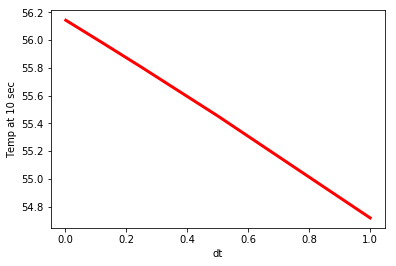

In [31]:
#--------------------------------------
#
# Without Runge-Kutta
#
#--------------------------------------
from math import log10
dt = 1.

iterations = 10
dt_array = np.zeros(iterations)
T_at_ten_array = np.zeros(iterations)


for j in range(0,iterations):
    
    dt_array[j] = dt
    
    nsteps = int(tmax/dt)    #the arrays will have different size for different time steps
    my_time = np.linspace(dt,tmax,nsteps) # Good shortcut for Time array
    my_temp = np.zeros(nsteps) # Initializing Temperature Array
    T = T0
    for i in range(1,nsteps):
        T = euler(T, -r*(T-Ts), dt)
        my_temp[i] = T # Filling Temperature array with Euler increments
        if (my_time[i] == 10.):
            print ("In loop")
            print (my_temp[i])
            #T_at_ten_array[j] = log10(my_temp[i])
            T_at_ten_array[j] = my_temp[i]
            #print (T_at_ten_array[j])
    dt = dt/2.

pyplot.plot(dt_array, T_at_ten_array, color = 'red', ls = '-', lw = 3)
pyplot.xlabel('dt'); #The semicolon avoids something 
pyplot.ylabel('Temp at 10 sec');

In loop
53.3203906424
In loop
54.7679038315
In loop
55.4649581007
In loop
55.8070039671
In loop
55.976430189
In loop
56.0607470313
In loop
56.1028067464
In loop
56.1238119724
In loop
56.1343084331
In loop
56.1395551261


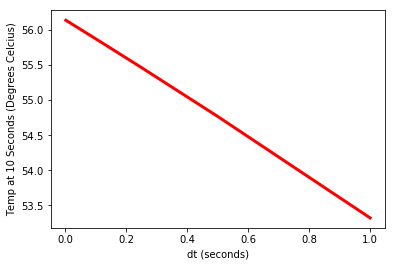

In [37]:
#--------------------------------------
#
# With Runge-Kutta
#
#--------------------------------------

#from math import log10

dt = 1.

# ln: Lambda functions
# kn: Kutta order
# jn: f(x,y) derivative function order
# mn

l1 = lambda dx, j1: dx*j1 
l2 = lambda dx, j2: dx*j2 
l3 = lambda dx, j3: dx*j3  
l4 = lambda dx, j4: dx*j4 

newT = lambda m_n, m1, m2, m3, m4: m_n + (m1 + 2*m2 + 2*m3 + m4)/(6.0)

iterations = 10
dt_array = np.zeros(iterations)
T_at_ten_array = np.zeros(iterations)

for j in range(0,iterations):
    
    #dt_array[j] = log10(dt)
    dt_array[j] = dt
    
    nsteps = int(tmax/dt)    #the arrays will have different size for different time steps
    my_time = np.linspace(dt,tmax,nsteps)#dt,tmax,nsteps) # Good shortcut for Time array
    my_temp = np.zeros(nsteps) # Initializing Temperature Array
    
    T = T0
    
    for i in range(1,nsteps):
        
        # Need to repeat process for every time T is updated.
        f1 = -r*(T-Ts)
        k1 = l1(dt, f1)
    
        f2 = -r*((T+(k1/2))-Ts)
        k2 = l2(dt, f2)
    
        f3 = -r*((T+(k2/2))-Ts)
        k3 = l3(dt, f3)
    
        f4 = -r*((T+k3)-Ts)
        k4 = l4(dt, f4)
        
        T = newT(T, k1, k2, k3, k4)
        my_temp[i] = T # Filling Temperature array with Euler increments
        if (my_time[i] == 10.):
            print ("In loop")
            print (my_temp[i])
            #T_at_ten_array[j] = log10(my_temp[i])
            T_at_ten_array[j] = my_temp[i]
            #print (T_at_ten_array[j])
    dt = dt/2.

      
    #pyplot.plot(my_time, my_temp, color=my_color[j], ls='-', lw=3) #Plotting T vs. t for dt
    #dt = dt/2. #Updating dt, repeat process.
pyplot.plot(dt_array, T_at_ten_array, color = 'red', ls = '-', lw = 3)
pyplot.xlabel('dt (seconds)'); #The semicolon avoids something 
pyplot.ylabel('Temp at 10 Seconds (Degrees Celcius)')

By looking at the printed T(t=10) values, it appears there is a convergence towards some value ~56.14 degrees Celcius, and the plotted trend is **not** linear.